# <center/> CS146: Assignment II
# <center/> Taha Bouhoun

In [146]:
import numpy as np
from math import*
import pandas as pd
import scipy as sp
import random as rn
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

# Call center data modeling
Complete the call center data modeling assignment we start in the Pre-class work and Activity 2 breakouts of Session 2.2. You may re-use and build on all code or any other work from the class session.
In class, we completed the Bayesian data modeling problem for 1 hour of the day. In this assignment, you need to do the same analysis for all 24 hours of the day.

- Compute a 98% posterior confidence interval over the number of calls per minute (the call rate λ ) for each hour of the day — so you will have 24 confidence intervals. Also, compute the posterior mean of λ for each hour of the day.
- Present your results graphically using Matplotlib. Make a plot that looks like the one below. Each dot is at the posterior mean and each line shows a 98% confidence interval for a λ. You can use the errorbar() function in the plotting library to do this.

## I. Processing the data

Size of data set: 5856 

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


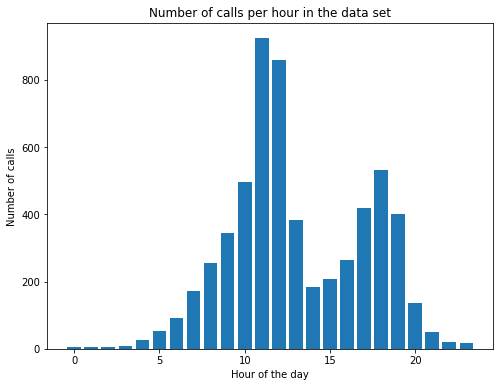

In [153]:
# Code from Call Center Breakout [Session 2.2]

# Loading the call center data
waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set
print('Size of data set:', len(waiting_times_day),'\n')


# Make 24 empty lists, one per hour
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# reconsider using this bit of code: 
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' 
          % (hour, hour + 1, len(waiting_times_hour)))

# Plot the number of calls per hour using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.xlabel('Hour of the day')
plt.ylabel('Number of calls')
plt.title('Number of calls per hour in the data set')
plt.show()

## II. Distribution of calls for one hour

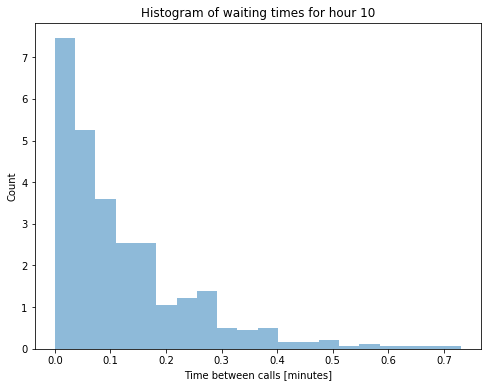

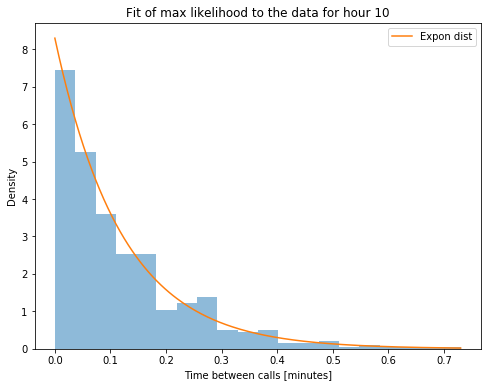

In [161]:
# Plot histogram of waiting times for one hour [10th hour as an example]

hour_index = 10
waiting_times_hour = waiting_times_per_hour[hour_index]

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20, alpha=0.5, density= True)
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Count')
plt.title(f'Histogram of waiting times for hour {hour_index}')
plt.show()


# The likelihood function for λ on the data's histogram

lambda_ = 1 / np.mean(waiting_times_hour)
dist = sts.expon(scale=1/lambda_)

plt.figure(figsize=(8, 6))
plt.hist(waiting_times_hour, bins=20, density=True, alpha=0.5)
x = np.linspace(0, max(waiting_times_hour), 200)
y = dist.pdf(x)

plt.plot(x, y, label ='Expon dist')
plt.xlabel('Time between calls [minutes]')
plt.ylabel('Density')
plt.title(f'Fit of max likelihood to the data for hour {hour_index}')
plt.legend(loc=1)
plt.show()

Since the likelihood follow an exponential distribution, the prior (which follow a Gamma distribution) would be considered a conjugate prior. Therefore, the parameters of the posterior would be easier to compute.

According to the [conjugate priors documentation in Wikipedia], the posterior will follow a Gamma distribution and its parameters can be computed through these expressions:
- Posterior alpha = prior alpha + size of the data
- Posterior beta = prior beta + sum of the data

$$post\ \alpha\ =\ prior\ \alpha\ +n$$
$$post\ \beta\ =\ prior\ \beta\ +\sum_{i=1}^nx_i$$

Prior α: 1 
Prior β: 0.25

Posterior α: 497.00 
Posterior β: 60.03

The 98% Confidence interval of λ:
 7.440 | 9.168


Text(0.5, 0, 'Parmeter λ')

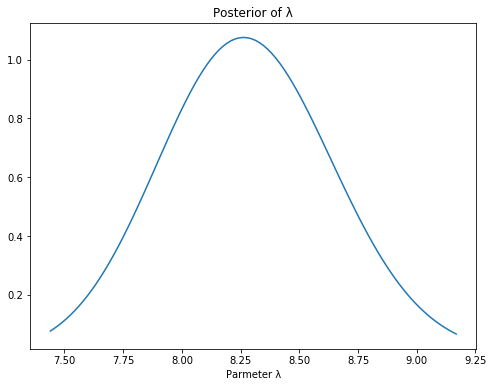

In [162]:
prior_α, prior_β = 1, 0.25 # Setting the prior values of α and β
print('Prior α:', prior_α, 
      '\nPrior β:', prior_β)

post_α = prior_α + len(waiting_times_hour)
post_β = prior_β + np.sum(waiting_times_hour)
print('\nPosterior α:', '{:.2f}'.format(post_α), 
      '\nPosterior β:', '{:.2f}'.format(post_β))

posterior = sts.gamma(post_α, scale=1/post_β)
l_bond = posterior.interval(0.98)[0]
u_bond = posterior.interval(0.98)[1]
print('\nThe 98% Confidence interval of λ:\n',
     '{:.3f}'.format(l_bond), '|', 
     '{:.3f}'.format(u_bond))

x = np.linspace(l_bond, u_bond, 100)
y = posterior.pdf(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y)

plt.title('Posterior of λ')
plt.xlabel('Parmeter λ')
# plt.ylabel('probability density')

Following the same process for all the hours of the day, we can find the mean of λ and the 98% confidence interval:

In [158]:
x = range(24)
CI_upper, CI_lower = [], []
mu = []

for i in waiting_times_per_hour:
    post_α = prior_α + len(i)
    post_β = prior_β + np.sum(i)
    posterior = sts.gamma(post_α, scale=1/post_β)
    CI_lower.append(posterior.interval(0.98)[0])
    CI_upper.append(posterior.interval(0.98)[1])
    mu.append(posterior.mean())
print('The posterior mean of λ and 98% CI for each hour:')
for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('\n%02i:00-%02i:00 \nMean: %.4f \nCI: %.4f | %.3f' 
          % (hour, hour + 1, mu[hour], CI_lower[hour], CI_upper[hour]))

The posterior mean of λ and 98% CI for each hour:

00:00-01:00 
Mean: 0.0981 
CI: 0.0292 | 0.214

01:00-02:00 
Mean: 0.0746 
CI: 0.0191 | 0.173

02:00-03:00 
Mean: 0.0911 
CI: 0.0303 | 0.190

03:00-04:00 
Mean: 0.2427 
CI: 0.0946 | 0.469

04:00-05:00 
Mean: 0.4423 
CI: 0.2686 | 0.664

05:00-06:00 
Mean: 0.9033 
CI: 0.6421 | 1.214

06:00-07:00 
Mean: 1.5912 
CI: 1.2344 | 1.998

07:00-08:00 
Mean: 2.8810 
CI: 2.3974 | 3.413

08:00-09:00 
Mean: 4.2569 
CI: 3.6614 | 4.902

09:00-10:00 
Mean: 5.7287 
CI: 5.0367 | 6.469

10:00-11:00 
Mean: 8.2795 
CI: 7.4401 | 9.168

11:00-12:00 
Mean: 15.3428 
CI: 14.1936 | 16.541

12:00-13:00 
Mean: 14.2507 
CI: 13.1440 | 15.406

13:00-14:00 
Mean: 6.3494 
CI: 5.6191 | 7.128

14:00-15:00 
Mean: 3.0941 
CI: 2.5909 | 3.646

15:00-16:00 
Mean: 3.4522 
CI: 2.9199 | 4.033

16:00-17:00 
Mean: 4.3795 
CI: 3.7770 | 5.031

17:00-18:00 
Mean: 6.9723 
CI: 6.2053 | 7.788

18:00-19:00 
Mean: 8.7972 
CI: 7.9343 | 9.709

19:00-20:00 
Mean: 6.6475 
CI: 5.8997 | 7.444

20:

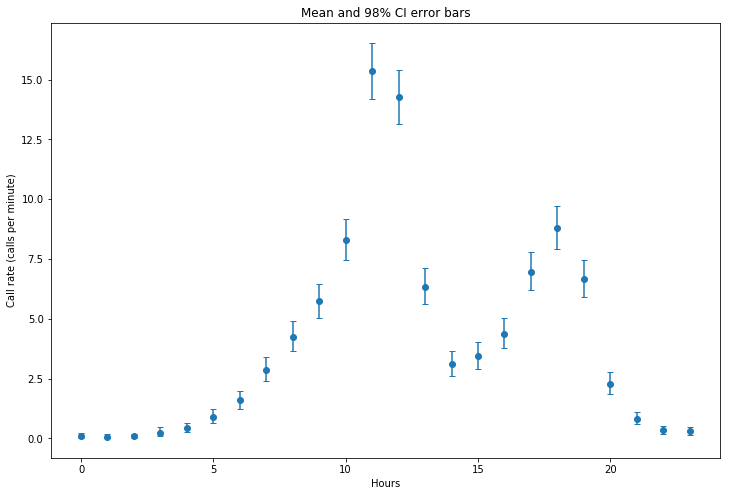

In [159]:
mu = np.asarray(mu)
CI_lower = np.asarray(CI_lower)
CI_upper = np.asarray(CI_upper)

plt.figure(figsize=(12, 8))
plt.errorbar(x, mu, yerr = [mu - CI_lower, CI_upper - mu],
            fmt='o', capsize=3)

plt.xlabel('Hours')
plt.ylabel('Call rate (calls per minute)')
plt.title('Mean and 98% CI error bars')
plt.show()

- Write a paragraph (100–200 words) to accompany your plot and present your findings to the client. Carefully summarize how many calls you expect during different parts of the day, and how much uncertainty there is in your estimates. Remember that the client is not an expert in statistics, so make it easy for them to understand. You may also make additional plots to help communicate your results

The graph above shows the expected number of calls for each hour of the day based on data collected in one day from the Call Center.
The graph also shows the error bars that highlight our certainty of the expected number of calls (wider bars refers to more uncertainty; narrow bars reflect less uncertainty).
We notice that the expected number of calls in each of the first 6 hours is less than two, and given the narrow error bars, the uncertainty is low. The same observation applies for the last 3 hours of the day.
The number of calls then increases gradually, and the uncertainty gets higher as we approach the mode of the distribution (the hour with the most expected number of calls) from 11 AM to noon. The highest uncertainty occurs during that hour with +- one call from 15 expected number of calls. 
After 1 PM, the number of calls decreases sharply to about three calls at 2 PM, and the uncertainty about the expected calls falls to $(+-0.5)$ call.
The calls number rises slightly after 5 PM to reach a local peak of 8 calls at 6 PM, and the uncertainty level didn't change significantly during that period. 
Finally, the number of calls decrease, and so is the uncertainty about their expected mean to reach the low level of the last 3 hours of the day.

# More practice exercises (optional)
Below are additional practice exercises for you to attempt. These are optional and you can choose to do as many or as few as you want. These exercises will not be graded.
If you get stuck on any of them, contact your instructor with specific questions via email and during office hours. Just saying “I’m stuck” is not enough — explain what you tried and where you got stuck so your instructor can understand your thinking and where you might have missed something or made a mistake.

1. Answer the following questions using Python.
    - Generate 1000 samples from a normal distribution with mean 100 and standard deviation 10. How many of the numbers are at least 2 standard deviations away from the mean? How many to you expect to be at least 2 standard deviations away from the mean?
    - Toss a fair coin 50 times. How many heads do you have? How many heads to you expect to have?
    - Roll a 6-sided die 1000 times. How many 6s did you get? How many 6s do you expect to get?
    - How much area (probability) is to the right of 1.5 for a normal distribution with mean 0 and standard deviation 2?

In [230]:
# Sampling form a normal distribution:

mu, sd = 100, 10
sample = np.random.normal(mu, sd, 1000)

print('Empirical result:', 
      len([x for x in sample if (abs(x-mu) > 2*sd)]), 
      'numbers 2 SD from the mean')

# 2 standard deviations corresponds to the 95.4 percentile
print('Theoretical result:', 
      len([x for x in sample if (x > np.percentile(sample, 95.4))]),
     'numbers 2 SD from the mean')

Empirical result: 45 numbers 2 SD from the mean
Theoretical result: 46 numbers 2 SD from the mean


In [185]:
# Coin toss:
# We assume that head is represented by 1 and tail is represented by 0

print('Number of heads:', sum(rn.choice([0, 1]) for _ in range(50)))
print('Expected heads :', 0.5 * 50)

Number of heads: 21
Expected heads : 25.0


In [188]:
# 6-sided die:
# We assume that 6 is represented by 1 and the other numbers by 0

print('Number of 6s:', sum(rn.choice([0,0,0,0,0,1]) for _ in range(1000)))
print('Expected 6s : {:.3f}'.format((1/6) * 1000))

Number of 6s: 154
Expected 6s : 166.667


The area under the curve for x > 1.5:
 0.22663


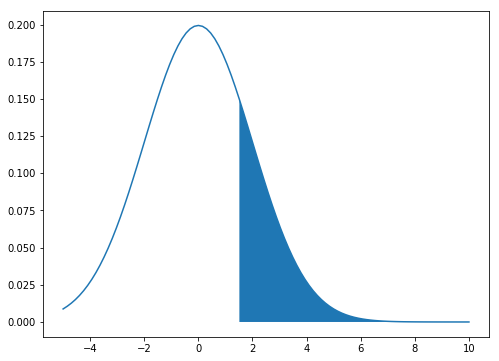

In [228]:
# Using the cumulative distribution function
print('The area under the curve for x > 1.5:\n',
    '{:.5f}'.format(1-sts.norm.cdf(1.5, 0, 2)))

# Visualization of the area under the probability curve
x = np.linspace(-5, 10, 100)
y = sts.norm.pdf(x, 0, 2)
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.fill_between(x[x>1.5], sts.norm.pdf(x[x>1.5], 0, 2))
plt.show()

2. Let y be the number of 6s in 1000 rolls of a fair die.
    - Draw a sketch of the approximate distribution of y, based on the normal approximation.
    - Using the normal distribution function in SciPy, give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of y.

Mean: 166.667
Standard Deviation : 11.785


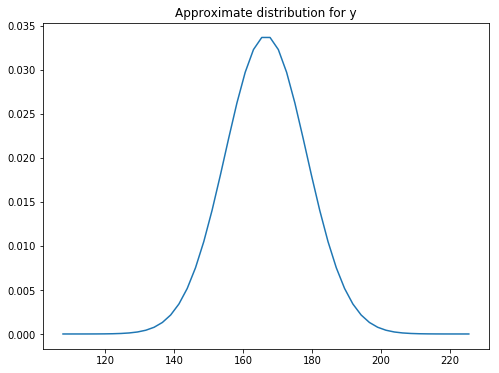

In [247]:
# Parameters of the normal distribution:
# mean = n * P 
# standard deviation = sqrt[ n * P * ( 1 - P ) ]

mu = 1000 * (1/6)
sd = sqrt(1000 * (1/6) * (1 - (1/6)))
print('Mean: %.3f\nStandard Deviation : %.3f'%(mu, sd))

x = np.linspace(mu-5*sd, mu+5*sd)
plt.figure(figsize=(8, 6))
plt.title("Approximate distribution for y")
plt.plot(x, sts.norm.pdf(x, mu, sd))

In [248]:
approx = [0.05, 0.25, 0.5, 0.75, 0.95]
n_approx = list(sts.norm.ppf(approx, mu, sd))
for _ in range (len(approx)):
    print('%.2f percentile: %.3f' 
          % (approx[_], n_approx[_]))

0.05 percentile: 147.282
0.25 percentile: 158.718
0.50 percentile: 166.667
0.75 percentile: 174.616
0.95 percentile: 186.051


## References:
- Conjugate prior. Wikipedia entry. Retrieved from: https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions
- Flectcher, T. (2018). Gaussian priors. Retrieved from: http://www.cs.utah.edu/~fletcher/cs6190/lectures/GaussianPriors.html
- Bognar, M. (2015). Probability Distribution Applets. Department of Statistics and Actuarial Science, University of Iowa. Retrieved from: https://homepage.divms.uiowa.edu/~mbognar/